In [33]:
import pandas as pd

# Load Excel file (raw, just to see original)
df_raw = pd.read_excel("C:/Users/9272.IONEXCH/Project/RO Dignostics/RO-1 Data.xlsx")
print(df_raw.head())   # Just for inspection

df = pd.read_excel(
    "C:/Users/9272.IONEXCH/Project/RO Dignostics/RO-1 Data.xlsx",
    sheet_name="Sheet1",
    header=0   
)

 

        Date  RO-1 Feed pH  RO-1 Feed  EC\n(µs/cms)  RO-1 Feed  TDS (mg/l)  \
0 2023-12-15          7.90                      NaN                    NaN   
1 2023-12-16           NaN                      NaN                    NaN   
2 2023-12-17          7.70                      NaN                    NaN   
3 2023-12-18          7.65                      NaN                    NaN   
4 2023-12-19          7.80                      NaN                    NaN   

  RO-1 Feed  TSS (mg/l)  RO-1 Feed Turbidity\nNTU  RO-1 Feed  COD (mg/l)  \
0                    ND                       0.3                    NaN   
1                   NaN                       NaN                    NaN   
2                   NaN                       0.7                    NaN   
3                    ND                       0.5                  450.0   
4                   NaN                       0.8                    NaN   

  RO-1 Feed  BOD (mg/l)  RO-1 Feed BOD:\nCOD\nRatio  RO-1 Feed NH3N (mg/l)

In [34]:
df.shape

(643, 38)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        643 non-null    datetime64[ns]
 1   RO-1 Feed pH                482 non-null    float64       
 2   RO-1 Feed  EC
(µs/cms)      380 non-null    float64       
 3   RO-1 Feed  TDS (mg/l)       321 non-null    float64       
 4   RO-1 Feed  TSS (mg/l)       341 non-null    object        
 5   RO-1 Feed Turbidity
NTU     195 non-null    float64       
 6   RO-1 Feed  COD (mg/l)       439 non-null    float64       
 7   RO-1 Feed  BOD (mg/l)       85 non-null     object        
 8   RO-1 Feed BOD:
COD
Ratio    28 non-null     float64       
 9   RO-1 Feed NH3N (mg/l)       218 non-null    float64       
 10  RO-1 Feed Zinc (mg/l)       111 non-null    float64       
 11  RO-1 Feed Total Hardness    175 non-null    float64       

In [36]:
# Drop rows where Date is missing
if "Date" in df.columns:
    df.dropna(subset=["Date"], inplace=True)
else:
    print("Error: Column 'Date' not found in the DataFrame.")
    import sys
    sys.exit(1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        643 non-null    datetime64[ns]
 1   RO-1 Feed pH                482 non-null    float64       
 2   RO-1 Feed  EC
(µs/cms)      380 non-null    float64       
 3   RO-1 Feed  TDS (mg/l)       321 non-null    float64       
 4   RO-1 Feed  TSS (mg/l)       341 non-null    object        
 5   RO-1 Feed Turbidity
NTU     195 non-null    float64       
 6   RO-1 Feed  COD (mg/l)       439 non-null    float64       
 7   RO-1 Feed  BOD (mg/l)       85 non-null     object        
 8   RO-1 Feed BOD:
COD
Ratio    28 non-null     float64       
 9   RO-1 Feed NH3N (mg/l)       218 non-null    float64       
 10  RO-1 Feed Zinc (mg/l)       111 non-null    float64       
 11  RO-1 Feed Total Hardness    175 non-null    float64       

In [38]:


# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Drop completely empty columns
df = df.dropna(axis=1, how="all")

# Simplify column names
df = df.rename(columns=lambda x: str(x).strip().replace("\n", "_").replace(" ", "_"))

print(df.head())
print(df.columns)

# Save cleaned dataframe to Excel
output_path = "C:/Users/9272.IONEXCH/Project/RO Dignostics/RO-1_cleaned.xlsx"
df.to_excel(output_path, index=False)

print(f"✅ Cleaned file saved at: {output_path}")


        Date  RO-1_Feed_pH  RO-1_Feed__EC_(µs/cms)  RO-1_Feed__TDS_(mg/l)  \
0 2023-12-15          7.90                     NaN                    NaN   
1 2023-12-16           NaN                     NaN                    NaN   
2 2023-12-17          7.70                     NaN                    NaN   
3 2023-12-18          7.65                     NaN                    NaN   
4 2023-12-19          7.80                     NaN                    NaN   

  RO-1_Feed__TSS_(mg/l)  RO-1_Feed_Turbidity_NTU  RO-1_Feed__COD_(mg/l)  \
0                    ND                      0.3                    NaN   
1                   NaN                      NaN                    NaN   
2                   NaN                      0.7                    NaN   
3                    ND                      0.5                  450.0   
4                   NaN                      0.8                    NaN   

  RO-1_Feed__BOD_(mg/l)  RO-1_Feed_BOD:_COD_Ratio  RO-1_Feed_NH3N_(mg/l)  ...  \
0    

Load CLeaned Df

In [44]:
import pandas as pd
import numpy as np
import re

# path to your cleaned file (or to the raw file and set header accordingly)
file_path = r"C:/Users/9272.IONEXCH/Project/RO Dignostics/RO-1_cleaned.xlsx"

# if you haven't cleaned yet, use header=0 or header=1 accordingly:
df = pd.read_excel(file_path, sheet_name="Sheet1", header=0)
print("rows,cols:", df.shape)
print(df.columns.tolist())
df.head()

rows,cols: (643, 38)
['Date', 'RO-1_Feed_pH', 'RO-1_Feed__EC_(µs/cms)', 'RO-1_Feed__TDS_(mg/l)', 'RO-1_Feed__TSS_(mg/l)', 'RO-1_Feed_Turbidity_NTU', 'RO-1_Feed__COD_(mg/l)', 'RO-1_Feed__BOD_(mg/l)', 'RO-1_Feed_BOD:_COD_Ratio', 'RO-1_Feed_NH3N_(mg/l)', 'RO-1_Feed_Zinc_(mg/l)', 'RO-1_Feed_Total_Hardness', 'RO-1_Feed_Ca_Hardness', 'RO-1_Feed_Total_Alkalinity', 'RO-1_Feed_PO4_(mg/l)', 'RO-1_Feed_T-Fe_(mg/l)', 'RO-1_Feed_SDI', 'RO-1_P_PH', 'RO-1_P_COND_µs/cms', 'RO-1_P_TDS_(mg/l)', 'RO-1_P_COD_(mg/l)', 'RO-1_P_Total_Hardnes', 'RO-1_P_Ca_Hardness', 'RO-1_P_NH3N_(mg/l)', 'RO-1_R_SDI', 'RO-1_R_PH', 'RO-1_R_COND_µs/cms', 'RO-1_R_TSS', 'RO-1_R_TDS_(mg/l)', 'RO-1_R_Total_Hardnes', 'RO-1_R_Ca_Hardness', 'RO-1_R_Total_Alkalinity', 'RO-1_R_COD_(mg/l)', 'RO_1_FEED_PRESSURE', 'RO_1_Rej_PRESSURE', 'RO-1_Feed_FLOW_(m3/hr)', 'RO-1_Permeate_FLOW_(KL)', 'RO-1_REJECT_FLOW_(KL)']


,Date,RO-1_Feed_pH,RO-1_Feed__EC_(µs/cms),RO-1_Feed__TDS_(mg/l),RO-1_Feed__TSS_(mg/l),RO-1_Feed_Turbidity_NTU,RO-1_Feed__COD_(mg/l),RO-1_Feed__BOD_(mg/l),RO-1_Feed_BOD:_COD_Ratio,RO-1_Feed_NH3N_(mg/l),...,RO-1_R_TDS_(mg/l),RO-1_R_Total_Hardnes,RO-1_R_Ca_Hardness,RO-1_R_Total_Alkalinity,RO-1_R_COD_(mg/l),RO_1_FEED_PRESSURE,RO_1_Rej_PRESSURE,RO-1_Feed_FLOW_(m3/hr),RO-1_Permeate_FLOW_(KL),RO-1_REJECT_FLOW_(KL)
0,2023-12-15,7.90,NaN,NaN,ND,0.3,NaN,NaN,NaN,NaN,...,6290.0,NaN,NaN,NaN,760.0,NaN,NaN,NaN,NaN,NaN
1,2023-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-12-17,7.70,NaN,NaN,NaN,0.7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-12-18,7.65,NaN,NaN,ND,0.5,450.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-12-19,7.80,NaN,NaN,NaN,0.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        643 non-null    datetime64[ns]
 1   RO-1_Feed_pH                482 non-null    float64       
 2   RO-1_Feed__EC_(µs/cms)      380 non-null    float64       
 3   RO-1_Feed__TDS_(mg/l)       321 non-null    float64       
 4   RO-1_Feed__TSS_(mg/l)       341 non-null    object        
 5   RO-1_Feed_Turbidity_NTU     195 non-null    float64       
 6   RO-1_Feed__COD_(mg/l)       439 non-null    float64       
 7   RO-1_Feed__BOD_(mg/l)       85 non-null     object        
 8   RO-1_Feed_BOD:_COD_Ratio    28 non-null     float64       
 9   RO-1_Feed_NH3N_(mg/l)       218 non-null    float64       
 10  RO-1_Feed_Zinc_(mg/l)       111 non-null    float64       
 11  RO-1_Feed_Total_Hardness    175 non-null    float64       

1. Handling "ND", "NA", "-", etc.

These are non-detects or placeholders. We should convert them to NaN so Pandas treats them as missing values:

In [46]:
df = df.replace({"ND": np.nan, "nd": np.nan, "NA": np.nan, "na": np.nan, "-": np.nan, "": np.nan})


In [47]:
Fill Missing Values

We want to keep the dataset continuous:

Forward Fill (FFILL): Use last known value until new one appears. Works well if plant operation is steady.

SyntaxError: invalid syntax (2453043254.py, line 1)

In [48]:
df = df.interpolate(method="linear")


C:\Users\9272.IONEXCH\AppData\Local\Temp\ipykernel_16024\761454162.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method="linear")


In [49]:
# Save cleaned dataframe to Excel
output_path = "C:/Users/9272.IONEXCH/Project/RO Dignostics/RO-1_cleaned_final.xlsx"
df.to_excel(output_path, index=False)

print(f"✅ Cleaned file saved at: {output_path}")


✅ Cleaned file saved at: C:/Users/9272.IONEXCH/Project/RO Dignostics/RO-1_cleaned_final.xlsx


Load final Cleaned df

In [71]:
import pandas as pd
import numpy as np
import re

# path to your cleaned file (or to the raw file and set header accordingly)
file_path = r"C:/Users/9272.IONEXCH/Project/RO Dignostics/RO-1_cleaned_final.xlsx"

# if you haven't cleaned yet, use header=0 or header=1 accordingly:
df_kpi = pd.read_excel(file_path, sheet_name="Sheet1", header=0)
print("rows,cols:", df.shape)
print(df.columns.tolist())
df.head()

rows,cols: (643, 38)
['Date', 'RO-1_Feed_pH', 'RO-1_Feed__EC_(µs/cms)', 'RO-1_Feed__TDS_(mg/l)', 'RO-1_Feed__TSS_(mg/l)', 'RO-1_Feed_Turbidity_NTU', 'RO-1_Feed__COD_(mg/l)', 'RO-1_Feed__BOD_(mg/l)', 'RO-1_Feed_BOD:_COD_Ratio', 'RO-1_Feed_NH3N_(mg/l)', 'RO-1_Feed_Zinc_(mg/l)', 'RO-1_Feed_Total_Hardness', 'RO-1_Feed_Ca_Hardness', 'RO-1_Feed_Total_Alkalinity', 'RO-1_Feed_PO4_(mg/l)', 'RO-1_Feed_T-Fe_(mg/l)', 'RO-1_Feed_SDI', 'RO-1_P_PH', 'RO-1_P_COND_µs/cms', 'RO-1_P_TDS_(mg/l)', 'RO-1_P_COD_(mg/l)', 'RO-1_P_Total_Hardnes', 'RO-1_P_Ca_Hardness', 'RO-1_P_NH3N_(mg/l)', 'RO-1_R_SDI', 'RO-1_R_PH', 'RO-1_R_COND_µs/cms', 'RO-1_R_TSS', 'RO-1_R_TDS_(mg/l)', 'RO-1_R_Total_Hardnes', 'RO-1_R_Ca_Hardness', 'RO-1_R_Total_Alkalinity', 'RO-1_R_COD_(mg/l)', 'RO_1_FEED_PRESSURE', 'RO_1_Rej_PRESSURE', 'RO-1_Feed_FLOW_(m3/hr)', 'RO-1_Permeate_FLOW_(KL)', 'RO-1_REJECT_FLOW_(KL)']


,Date,RO-1_Feed_pH,RO-1_Feed__EC_(µs/cms),RO-1_Feed__TDS_(mg/l),RO-1_Feed__TSS_(mg/l),RO-1_Feed_Turbidity_NTU,RO-1_Feed__COD_(mg/l),RO-1_Feed__BOD_(mg/l),RO-1_Feed_BOD:_COD_Ratio,RO-1_Feed_NH3N_(mg/l),...,RO-1_R_TDS_(mg/l),RO-1_R_Total_Hardnes,RO-1_R_Ca_Hardness,RO-1_R_Total_Alkalinity,RO-1_R_COD_(mg/l),RO_1_FEED_PRESSURE,RO_1_Rej_PRESSURE,RO-1_Feed_FLOW_(m3/hr),RO-1_Permeate_FLOW_(KL),RO-1_REJECT_FLOW_(KL)
0,2023-12-15,7.90,NaN,NaN,NaN,0.3,NaN,NaN,NaN,NaN,...,6290.000000,NaN,NaN,NaN,760.000000,NaN,NaN,NaN,NaN,NaN
1,2023-12-16,7.80,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,...,6434.285714,NaN,NaN,NaN,805.714286,NaN,NaN,NaN,NaN,NaN
2,2023-12-17,7.70,NaN,NaN,NaN,0.7,NaN,NaN,NaN,NaN,...,6578.571429,NaN,NaN,NaN,851.428571,NaN,NaN,NaN,NaN,NaN
3,2023-12-18,7.65,NaN,NaN,NaN,0.5,450.0,NaN,NaN,NaN,...,6722.857143,NaN,NaN,NaN,897.142857,NaN,NaN,NaN,NaN,NaN
4,2023-12-19,7.80,NaN,NaN,NaN,0.8,553.0,NaN,NaN,NaN,...,6867.142857,NaN,NaN,NaN,942.857143,NaN,NaN,NaN,NaN,NaN


643 rows

✅ 38 columns

✅ Key KPIs inputs present:

Feed TDS → RO-1_Feed__TDS_(mg/l)

Permeate TDS → RO-1_P_TDS_(mg/l)

Feed Pressure → RO_1_FEED_PRESSURE

Reject Pressure → RO_1_Rej_PRESSURE

Feed Flow → RO-1_Feed_FLOW_(m3/hr)

Permeate Flow → RO-1_Permeate_FLOW_(KL)

Reject Flow → RO-1_REJECT_FLOW_(KL)

Some columns still have missing values (especially flow & pressure early on), but since we’ve already interpolated, this looks usable.

Step 1 Compute RO KPIs

In [72]:
import numpy as np

# Ensure Date is index
df = df.set_index("Date").sort_index()

# 1. Recovery %
df["Recovery_%"] = (df["RO-1_Permeate_FLOW_(KL)"] / df["RO-1_Feed_FLOW_(m3/hr)"]) * 100

# 2. Salt Passage % and Salt Rejection %
df["Salt_Passage_%"] = (df["RO-1_P_TDS_(mg/l)"] / df["RO-1_Feed__TDS_(mg/l)"]) * 100
df["Salt_Rejection_%"] = 100 - df["Salt_Passage_%"]

# 3. Delta P (Pressure Drop)
df["DeltaP_bar"] = df["RO_1_FEED_PRESSURE"] - df["RO_1_Rej_PRESSURE"]

# 4. Temperature Correction Factor (if you have temperature column, else use 1)
B = 0.021   # correction factor
Tref = 25   # reference temp
if "Temperature" in df.columns:
    df["TCF"] = np.exp(B * (df["Temperature"] - Tref))
else:
    df["TCF"] = 1

# 5. Normalized Permeate Flow
df["Norm_Permeate_Flow"] = df["RO-1_Permeate_FLOW_(KL)"] / df["TCF"]

# 6. Normalized Salt Passage (NSP %)
df["NSP_%"] = df["Salt_Passage_%"] / df["TCF"]




# ---- Rule-based Diagnosis ----

In [73]:
# ---- Rule-based Diagnosis ----
def diagnose(row):
    issues = []
    if pd.notna(row.get("Salt_Rejection_%")) and row["Salt_Rejection_%"] < 95:
        issues.append("Membrane Damage or Scaling")
    if pd.notna(row.get("Recovery_%")) and row["Recovery_%"] > 75:
        issues.append("Risk of Scaling")
    if pd.notna(row.get("DeltaP_bar")) and row["DeltaP_bar"] > 2:
        issues.append("Fouling / Clogging")
    if pd.notna(row.get("Norm_Permeate_Flow")) and row["Norm_Permeate_Flow"] < 0.8 * df["Norm_Permeate_Flow"].median():
        issues.append("Flow Decline - Fouling/Compaction")
    return "; ".join(issues) if issues else "Normal"

df["Diagnosis"] = df.apply(diagnose, axis=1)

In [74]:
# Save cleaned dataframe to Excel
output_path = "C:/Users/9272.IONEXCH/Project/RO Dignostics/RO-1_KPI_results.xlsx"
df.to_excel(output_path, index=False)

print(f"✅ Cleaned file saved at: {output_path}")


✅ Cleaned file saved at: C:/Users/9272.IONEXCH/Project/RO Dignostics/RO-1_KPI_results.xlsx


Step 2: Diagnosis Rules (Rule-Based)

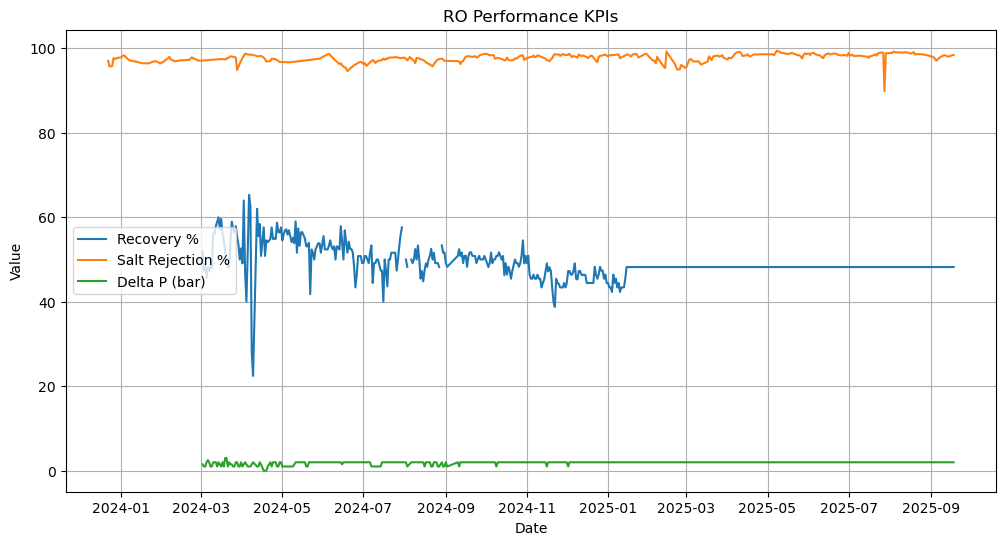

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df["Recovery_%"], label="Recovery %")
plt.plot(df.index, df["Salt_Rejection_%"], label="Salt Rejection %")
plt.plot(df.index, df["DeltaP_bar"], label="Delta P (bar)")
plt.legend()
plt.title("RO Performance KPIs")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.show()

Load KPI results

In [78]:
import pandas as pd

file_path = "C:/Users/9272.IONEXCH/Project/RO Dignostics/RO-1_KPI_results.xlsx"
df = pd.read_excel(file_path)

Clean KPIs for Modeling

In [80]:
import numpy as np

features = ["Recovery_%", "Salt_Rejection_%", "DeltaP_bar", "Norm_Permeate_Flow"]

# 1. Replace inf/-inf with NaN
df[features] = df[features].replace([np.inf, -np.inf], np.nan)

# 2. Drop rows with NaN in ANY of the features
X = df[features].dropna()

# 3. Clip absurd values (safety net)
X = X.clip(lower=-1e6, upper=1e6)

print("Remaining rows:", len(X))
print("Any NaN left? ->", X.isna().any().any())
print("Any Inf left? ->", np.isinf(X).any().any())

Remaining rows: 561
Any NaN left? -> False
Any Inf left? -> False


In [ ]:
scale and run isolation forest

In [81]:
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

iso = IsolationForest(contamination=0.05, random_state=42)
df.loc[X.index, "Anomaly"] = iso.fit_predict(X_scaled)
df.loc[X.index, "Anomaly_Score"] = iso.decision_function(X_scaled)

print("Anomaly counts:\n", df["Anomaly"].value_counts())

Anomaly counts:
 Anomaly
 1.0    533
-1.0     28
Name: count, dtype: int64


Results show:

533 rows normal (Anomaly = 1)

28 rows anomalous (Anomaly = -1)

That’s exactly in line with the contamination level (5%).

Performance Forecasting

showing Digital Twin – Efficiency Forecasting.

What we want to do

Build a regression model that can predict a key KPI (e.g., Permeate Flow or Salt Rejection) from process conditions (feed TDS, feed pressure, reject pressure, etc.).
This demonstrates forecasting capability: “Given today’s feedwater quality, what will my permeate flow look like?”

Forecasting Permeate Flow

Permeate Flow Forecast
R²: 0.0
MAE: 0.03501169590643672


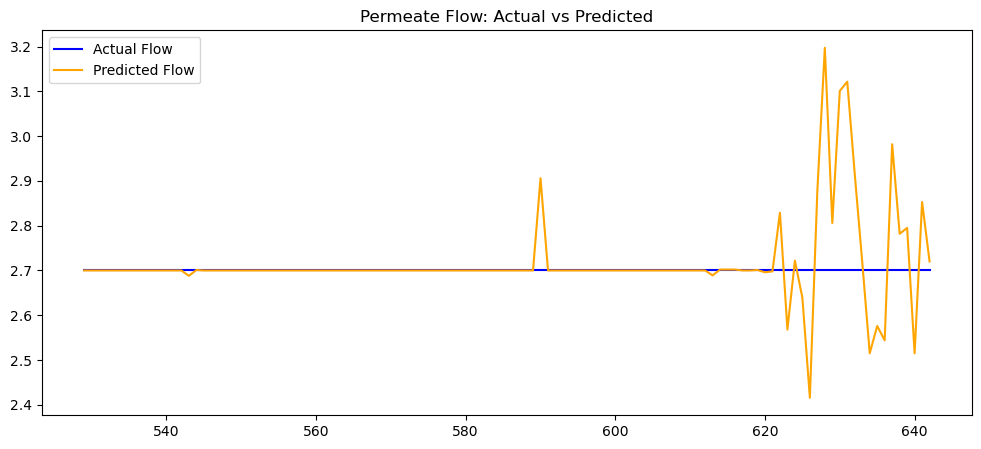

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# ---------- Permeate Flow Forecast ----------
target_flow = "RO-1_Permeate_FLOW_(KL)"
features = ["RO-1_Feed__TDS_(mg/l)", "RO_1_FEED_PRESSURE", "RO_1_Rej_PRESSURE"]

data_flow = df[features + [target_flow]].dropna()
Xf, yf = data_flow[features], data_flow[target_flow]

Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.2, shuffle=False)

model_flow = RandomForestRegressor(n_estimators=100, random_state=42)
model_flow.fit(Xf_train, yf_train)
yf_pred = model_flow.predict(Xf_test)

print("Permeate Flow Forecast")
print("R²:", r2_score(yf_test, yf_pred))
print("MAE:", mean_absolute_error(yf_test, yf_pred))

# Save predictions
df.loc[Xf_test.index, "Predicted_Permeate_Flow"] = yf_pred

# Plot
plt.figure(figsize=(12,5))
plt.plot(yf_test.index, yf_test, label="Actual Flow", color="blue")
plt.plot(yf_test.index, yf_pred, label="Predicted Flow", color="orange")
plt.legend(); plt.title("Permeate Flow: Actual vs Predicted"); plt.show()


Forecast Salt Rejection % (Quality)


Salt Rejection Forecast
R²: 0.5937915382794646
MAE: 0.08687713861558184


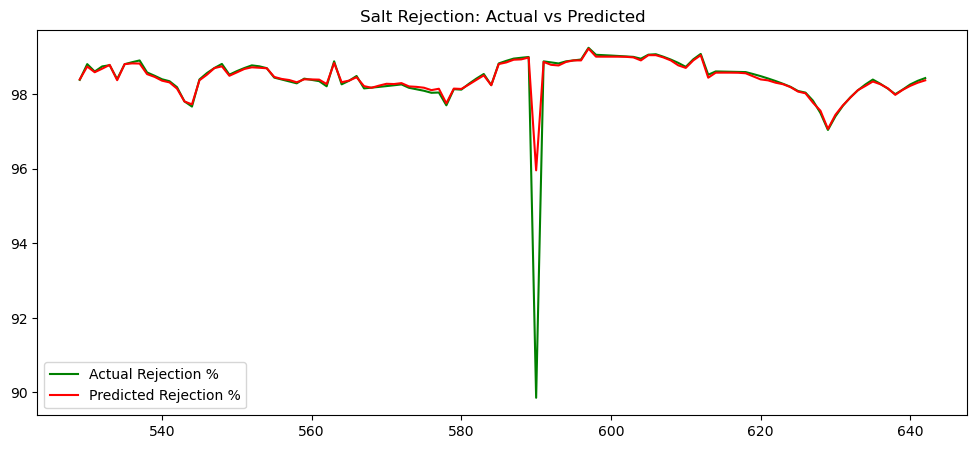

In [85]:
# ---------- Salt Rejection Forecast ----------
target_rej = "Salt_Rejection_%"
features_rej = ["RO-1_Feed__TDS_(mg/l)", "RO-1_P_TDS_(mg/l)", "RO_1_FEED_PRESSURE", "RO_1_Rej_PRESSURE"]

data_rej = df[features_rej + [target_rej]].dropna()
Xr, yr = data_rej[features_rej], data_rej[target_rej]

Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, shuffle=False)

model_rej = RandomForestRegressor(n_estimators=100, random_state=42)
model_rej.fit(Xr_train, yr_train)
yr_pred = model_rej.predict(Xr_test)

print("\nSalt Rejection Forecast")
print("R²:", r2_score(yr_test, yr_pred))
print("MAE:", mean_absolute_error(yr_test, yr_pred))

# Save predictions
df.loc[Xr_test.index, "Predicted_Salt_Rejection_%"] = yr_pred

# Plot
plt.figure(figsize=(12,5))
plt.plot(yr_test.index, yr_test, label="Actual Rejection %", color="green")
plt.plot(yr_test.index, yr_pred, label="Predicted Rejection %", color="red")
plt.legend(); plt.title("Salt Rejection: Actual vs Predicted"); plt.show()


Save final Results

In [86]:
output_path = "C:/Users/9272.IONEXCH/Project/RO Dignostics/RO-1_DigitalTwin_Forecasting.xlsx"
df.to_excel(output_path, index=False)
print(f"✅ Forecasting results saved: {output_path}")

✅ Forecasting results saved: C:/Users/9272.IONEXCH/Project/RO Dignostics/RO-1_DigitalTwin_Forecasting.xlsx


Permeate Flow Forecast

R² = 0.0 → model is not explaining variance at all (predictions are basically flat/mean).

MAE ≈ 0.035 KL → error is numerically small, but that’s only because our permeate flow values are low-range numbers (looks like 2–3 KL/hr/day range).

Why is R² so poor?

Likely our permeate flow hardly varies across dataset (maybe always ~2.7–3.0).

If target variable doesn’t change much, RandomForest cannot “learn a relationship” → flat predictions → R² = 0.

Also, only 3 input features were used (TDS, feed pressure, reject pressure). Flow is often influenced by temperature, membrane fouling condition, SDI, hours of operation etc., which we didn’t include.

2. Salt Rejection Forecast

R² ≈ 0.59 → moderate fit (captures ~60% variance).

MAE ≈ 0.087% → error is very small, since rejection % is ~97–99%.

So model is reasonably predicting rejection quality.

This is good — rejection seems more responsive to feed TDS and operating conditions.

In [ ]:
Key Takeaway:

“Our initial model predicts Salt Rejection reasonably well (R² ~0.6).

Permeate Flow is almost flat in dataset, so the model cannot explain variance — we may need to add more influencing features (e.g., Temperature, SDI, operating hours, normalized flow) to make it predictive.”

This shows you understand both data limitations and next steps.

Improved Permeate Flow Forecast
R²: 0.0
MAE: 5.773159728050814e-15


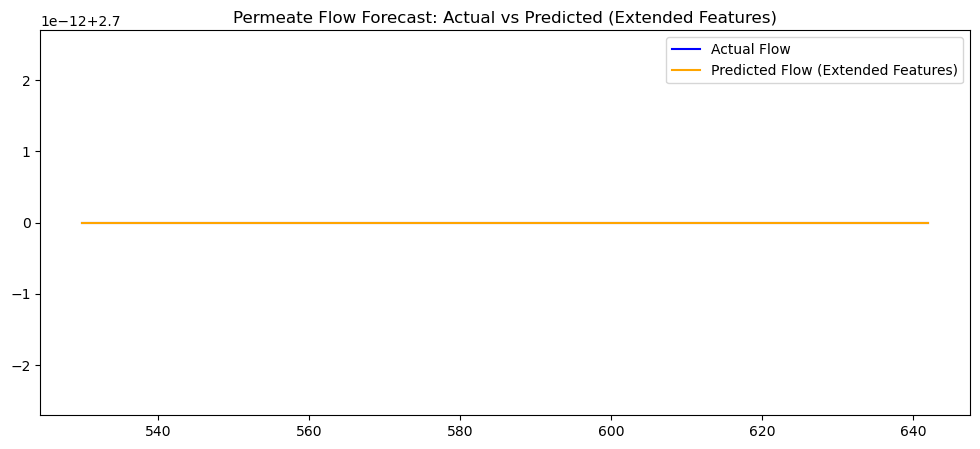

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# ---------- Improved Permeate Flow Forecast ----------
target_flow = "RO-1_Permeate_FLOW_(KL)"

# Extended features
features_ext = [
    "RO-1_Feed__TDS_(mg/l)",
    "RO_1_FEED_PRESSURE",
    "RO_1_Rej_PRESSURE",
    "Recovery_%",
    "NSP_%",
    "Norm_Permeate_Flow",
    "TCF"  # only if available in df
]

# Keep only features that exist in df
features_ext = [f for f in features_ext if f in df.columns]

data_flow_ext = df[features_ext + [target_flow]].dropna()
Xf, yf = data_flow_ext[features_ext], data_flow_ext[target_flow]

# Train/test split
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.2, shuffle=False)

# Model
model_flow_ext = RandomForestRegressor(n_estimators=200, random_state=42)
model_flow_ext.fit(Xf_train, yf_train)

# Predictions
yf_pred_ext = model_flow_ext.predict(Xf_test)

# Metrics
print("Improved Permeate Flow Forecast")
print("R²:", r2_score(yf_test, yf_pred_ext))
print("MAE:", mean_absolute_error(yf_test, yf_pred_ext))

# Save predictions
df.loc[Xf_test.index, "Predicted_Permeate_Flow_Ext"] = yf_pred_ext

# Plot
plt.figure(figsize=(12,5))
plt.plot(yf_test.index, yf_test, label="Actual Flow", color="blue")
plt.plot(yf_test.index, yf_pred_ext, label="Predicted Flow (Extended Features)", color="orange")
plt.legend(); plt.title("Permeate Flow Forecast: Actual vs Predicted (Extended Features)"); plt.show()


Results We Got

R² = 0.0 → model explains zero variance.

MAE ≈ 5.77e-15 → essentially zero error (numerical noise).


Flat Target Variable

Our Permeate Flow is basically constant in the dataset (same or nearly same values across rows).

When the target doesn’t change, the model can’t learn any pattern.

RandomForest just predicts the same constant → R² = 0 (since variance explained = 0).

Why MAE is ~0

Because the model’s constant prediction matches the actual constant values.

Example: if actual flow is always ~2.7 KL, then predicting 2.7 every time → perfect match, but R² still = 0 because there is no variance to explain.

Conclusion

Our plant flow is operated in a very stable range (good operationally!).- May be wrong the data itself as its not the sensor data.

But it makes forecasting meaningless → the model can’t “predict changes” if there are no changes in historical data.

“We built forecasting models for both quantity (Permeate Flow) and quality (Salt Rejection).

Salt Rejection forecasting works with R² ≈ 0.6, showing sensitivity to feed TDS and pressure.

Permeate Flow forecasting failed (R² = 0) because the dataset shows almost no variability in permeate flow — the plant is operated stably.

To make flow forecasting meaningful, we need datasets with events (membrane fouling, CIP cleaning, flux decline, recovery changes, etc.).”



uday testing